In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
import matplotlib.image as mpimg
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

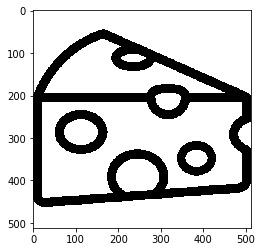

In [2]:
img=mpimg.imread('cheese.png')
img = img[:,:,3]
imgplot = plt.imshow(img, cmap='Greys')
#plt.plot(750,750, "ro")
plt.show()


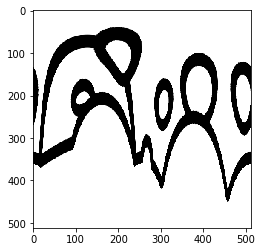

In [3]:
[nx, ny] = img.shape
origin = [nx//2, ny//2]
#origin = [750, 750]
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x = x - origin[0]
y = y - origin[1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
r_i = np.linspace(r.min(), r.max(), nx)
theta_i = np.linspace(theta.min(), theta.max(), ny)
theta_grid, r_grid = np.meshgrid(theta_i, r_i)
xi = r_grid * np.cos(theta_grid)
yi = r_grid * np.sin(theta_grid)

xi = xi + origin[0]
yi = yi + origin[1]


xi, yi = xi.flatten(), yi.flatten()
coords = np.vstack((xi, yi))
zi = sp.ndimage.map_coordinates(img.T, coords, order=1)
newimg = zi.reshape((nx, ny))

imgplot = plt.imshow(newimg, cmap='Greys')
plt.show()

8 4
(64, 128)


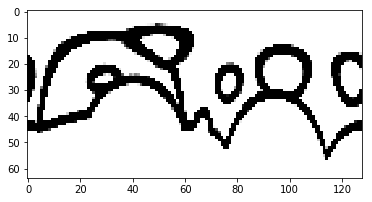

In [4]:
da = int(newimg.shape[0]/64)
dt = int(newimg.shape[1]/120)
print(da, dt)
newimg2 = newimg[0::da, 0::dt]
print(newimg2.shape)

imgplot = plt.imshow(newimg2, cmap='Greys')
plt.show()

In [ ]:
d